<a href="https://colab.research.google.com/github/cdario79/ML_Customer_Segmentation_Financial_Services_Company/blob/main/Segmentazione_della_clientela_di_un'azienda_di_servizi_finanziari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

 - CUST_ID : Identificazione del titolare della carta di credito (Categorico)
 - BALANCE : Importo del saldo rimasto sul conto per effettuare acquisti
 - BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
 - PURCHASES : Importo totale di acquisti effettuati dal conto
 - ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione
 - INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate
 - CASH_ADVANCE : Anticipo in contanti dato dall'utente
 - PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - ONEOFF_PURCHASES_FREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - PURCHASES_INSTALLMENTS_FREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).
 - CASH_ADVANCE_FREQUENCY : frequenza con cui viene pagato l'anticipo in contanti
 - CASH_ADVANCE_TRX : Numero di transazioni effettuate con "contanti in anticipo".
 - PURCHASES_TRX : Numero di transazioni di acquisto effettuate
 - CREDIT_LIMIT : Limite della carta di credito dell'utente
 - PAYMENTS  : Importo dei pagamenti effettuati dall'utente
 - MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente
 - PRC_FULL_PAYMENT : Percentuale del pagamento completo pagato dall'utente
 - TENURE : Durata del servizio di carta di credito per l'utente

 Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

## Soluzione

## IMPORTAZIONE LIBRERIE UTILIZZATE

In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

## CONFIGURAZIONE

In [2]:
RANDOM_SEED = 1

## FUNZIONI UTLIZZATE

In [3]:
def calculate_metrics(data, max_clusters):

    """
    Calculates various clustering metrics for a given dataset and range of cluster numbers.

    Args:
        data (array-like): Input data to perform clustering.
        max_clusters (int): Maximum number of clusters to consider.

    Returns:
        tuple: A tuple containing lists of inertias, silhouette scores, Davies-Bouldin scores, Calinski-Harabasz scores,
        fit times, best number of clusters, best inertia, best silhouette score, best Davies-Bouldin score,
        and best Calinski-Harabasz score.
    """

    inertias = []  # List to store inertia values
    silhouette_scores = []  # List to store silhouette scores
    db_scores = []  # List to store Davies-Bouldin scores
    ch_scores = []  # List to store Calinski-Harabasz scores
    fit_times = []  # List to store fit times

    for k in range(2, max_clusters + 1):
        start_time = time.time()  # Record start time for fitting

        # Initialize KMeans with current number of clusters and fit the data
        kmeans = KMeans(n_clusters=k, n_init=10, init="k-means++")
        kmeans.fit(data)
        labels = kmeans.labels_

        # Calculate inertia, silhouette score, Davies-Bouldin score, and Calinski-Harabasz score
        inertia = kmeans.inertia_
        sil_score = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)

        end_time = time.time()  # Record end time for fitting
        fit_time = end_time - start_time  # Calculate fitting time

        # Append the calculated metrics to respective lists
        inertias.append(inertia)
        silhouette_scores.append(sil_score)
        db_scores.append(db_score)
        ch_scores.append(ch_score)
        fit_times.append(fit_time)

    # Determine the best number of clusters based on mean silhouette score, mean Davies-Bouldin score,
    # and mean Calinski-Harabasz score
    best_K = np.argmax([np.mean(silhouette_scores), -np.mean(db_scores), np.mean(ch_scores)])
    best_K += 2  # Increment by 2 to match the actual number of clusters
    best_inertia = inertias[best_K - 2]
    best_silhouette = silhouette_scores[best_K - 2]
    best_db = db_scores[best_K - 2]
    best_ch = ch_scores[best_K - 2]

    return inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch

In [4]:
def plot_metrics(inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch):

    """
    Plot various clustering metrics against the number of clusters and display the best cluster information.

    Args:
        inertias (list): List of inertia values for different numbers of clusters.
        silhouette_scores (list): List of silhouette scores for different numbers of clusters.
        db_scores (list): List of Davies-Bouldin scores for different numbers of clusters.
        ch_scores (list): List of Calinski-Harabasz scores for different numbers of clusters.
        fit_times (list): List of fitting times for different numbers of clusters.
        best_K (int): The best number of clusters based on evaluation metrics.
        best_inertia (float): Inertia corresponding to the best number of clusters.
        best_silhouette (float): Silhouette score corresponding to the best number of clusters.
        best_db (float): Davies-Bouldin index corresponding to the best number of clusters.
        best_ch (float): Calinski Harabasz index corresponding to the best number of clusters.

    Returns:
        None
    """

    # Create a figure and axis object
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Create additional twin axes for overlaying multiple plots on the same figure
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax4 = ax1.twinx()

    # Hide axis labels and ticks for additional axes
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax4.set_ylabel('')
    ax3.set_ylabel('')

    ax1.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax2.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax3.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax4.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)

    # Turn off grid lines for additional axes
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    ax4.grid(False)

    # Turn on grid lines for the primary x-axis
    ax1.grid(True, axis="x")

    # Plot each metric against the number of clusters
    ax1.plot(range(2, len(inertias) + 2), inertias, 'r-', label='Inertia', marker="o")
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, 'b-', label='Silhouette Score', marker="o")
    ax3.plot(range(2, len(db_scores) + 2), db_scores, 'g-', label='Davies-Bouldin Index', marker="o")
    ax4.plot(range(2, len(ch_scores) + 2), ch_scores, 'c-', label='Calinski Harabasz Index', marker="o")

    # Set the label for the x-axis
    ax1.set_xlabel('Number of Clusters')

    # Add legends for each plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='lower left')
    ax4.legend(loc='lower right')

    # Add a vertical line and text indicating the best number of clusters
    ax1.axvline(x=best_K, color='gray', linestyle='--', label='Best K')
    ax1.text(best_K + 0.1, max(inertias), f'K = {best_K}', horizontalalignment='left', verticalalignment='top', color='gray', fontweight='bold')

    # Adjust layout to prevent clipping of labels
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Print the best cluster information
    print()
    print(f'BEST NUMBER OF CLUSTERS (K): {best_K}\nInertia: {best_inertia:.2f}\nSilhouette Score: {best_silhouette:.2f}\nDavies-Bouldin Index: {best_db:.2f}\nCalinski Harabasz Index: {best_ch:.2f}')

In [5]:
def show_metrics(data, max_clusters):

    """
    This function calculates clustering metrics for a given dataset and a range of maximum clusters,
    and then displays these metrics in a plot.

    Args:
        data (array-like): Input data to perform clustering.
        max_clusters (int): The maximum number of clusters to consider.

    Returns:
        None
    """

    # Calculate clustering metrics using the calculate_metrics function
    # This function returns various clustering metrics and the best number of clusters
    inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch = calculate_metrics(data, max_clusters)

    # Plot the calculated metrics using the plot_metrics function
    # This function creates a plot displaying the metrics against the number of clusters
    plot_metrics(inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch)

In [6]:
def plot_scatter_pca(X_pca, y_kmeans, centroids):

    """
    Plots a scatter plot of the data points in 2D PCA space with clusters and centroids.

    Args:
        X_pca (array-like): The data points transformed into 2D PCA space.
        y_kmeans (array-like): Cluster labels assigned to each data point.
        centroids (array-like): Coordinates of cluster centroids.

    Returns:
        None
    """

    # Create a new figure with a specified size
    plt.figure(figsize=(15, 10))

    # Iterate over each cluster
    for i in range(K):
        # Scatter plot of data points belonging to the current cluster
        plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i+1}', edgecolors='white')

    # Scatter plot of cluster centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.7, label='Centroids')

    # Add legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

In [7]:
def calculate_clusters_profile(df_final):

    """
    Calculates the clusters profile, including overall mean and mean for each cluster.

    Args:
        df_final (DataFrame): DataFrame containing the data

    Returns:
        DataFrame: DataFrame containing the clusters profile
    """

    # Add the prefix 'Cluster' to the 'CLUSTER' column
    df_final['CLUSTER'] = 'Cluster ' + df_final['CLUSTER'].astype(str)

    # Calculate the overall mean from the current DataFrame
    df_profile_overall = pd.DataFrame()
    df_profile_overall['Overall'] = df_final.describe().loc[['mean']].T

    # Summarize the mean of each cluster
    df_cluster_summary = df_final.groupby('CLUSTER').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
    df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

    # Combine both DataFrames
    df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

    # Display the resulting DataFrame
    display(df_profile)

In [8]:
def show_report(df):

    """
    This function generates a comprehensive report summarizing various statistics and characteristics of the DataFrame.

    Args:
        df (DataFrame): Input DataFrame for which the report is generated.

    Returns:
        None
    """

    # Calculate various statistics and characteristics of the DataFrame
    col_type = df.dtypes
    not_null_counts = df.count()
    unique_counts = df.nunique()
    unique_percent = (unique_counts / len(df)) * 100
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    min_values = df.min()
    max_values = df.max()
    zero_counts = (df == 0).sum()
    zero_percent = (zero_counts / len(df)) * 100

    mean_values = pd.Series(dtype='float64')
    median_values = pd.Series(dtype='float64')

    # Calculate mean and median values for numeric columns
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            mean_values[column] = df[column].mean()
            median_values[column] = df[column].median()
        else:
            mean_values[column] = np.nan
            median_values[column] = np.nan

    # Create a DataFrame to store the report
    report_df = pd.DataFrame({
        "Data Type": col_type,
        "Non-null Values": not_null_counts,
        "Missing Values": missing_counts,
        "% Missing Values": round(missing_percent, 2),
        "Unique Values": unique_counts,
        "% Unique Values": round(unique_percent, 2),
        "Zero Values": zero_counts,
        "% Zero Values": round(zero_percent, 2),
        "Minimum Value": min_values,
        "Maximum Value": max_values,
        "Mean": mean_values,
        "Median": median_values
    })

    # Get the shape of the DataFrame
    df_shape = df.shape

    # Print the shape of the DataFrame
    print(f'THE DATAFRAME HAS {df_shape[0]} ROWS AND {df_shape[1]} COLUMNS')
    print()

    # Display the generated report DataFrame
    display(report_df)

In [9]:
def show_correlation_matrix(df):

    """
    This function displays a correlation matrix heatmap for numeric columns in the DataFrame.

    Args:
        df (DataFrame): Input DataFrame for which the correlation matrix is generated.

    Returns:
        None
    """

    # Select numeric columns from the DataFrame
    df_num = df.select_dtypes(include=np.number)

    # Calculate the correlation matrix
    corr_matrix = df_num.corr()

    # Create a mask to display only the lower triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot the correlation matrix heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size": 8})

    # Set font size and family for y-axis and x-axis labels
    yticks, ylabels = plt.yticks()
    xticks, xlabels = plt.xticks()
    ax.set_xticklabels(xlabels, size=8, fontfamily='serif')
    ax.set_yticklabels(ylabels, size=8, fontfamily='serif')

    # Turn off grid lines
    ax.grid(False)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout(rect=[0, 0.04, 1, 1.01])

    # Show the plot
    plt.show()

In [10]:
def plot_distributions(dataframe):

    """
    This function plots the distributions of numeric columns in the DataFrame.

    Args:
        dataframe (DataFrame): Input DataFrame containing numeric columns.

    Returns:
        None
    """

    # Select only numeric columns from the DataFrame
    dataframe = dataframe.select_dtypes(include='number')

    # Calculate the number of rows and columns for subplot layout
    num_cols = dataframe.shape[1]
    num_rows = (num_cols - 1) // 3 + 1  # Divide the number of columns by 3 and round up to get the number of rows

    # Create a figure and axis grid for subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))
    fig.subplots_adjust(hspace=1, wspace=0.5)  # Adjust spacing between subplots

    # Iterate over each numeric column and plot its distribution
    for i, col in enumerate(dataframe.columns):
        row_idx = i // 3  # Calculate the row index for the subplot
        col_idx = i % 3   # Calculate the column index for the subplot
        ax = axes[row_idx, col_idx]  # Select the appropriate axis for the subplot
        dataframe[col].plot(kind='hist', ax=ax)  # Plot histogram of the column on the selected axis
        ax.set_title(col)  # Set the title of the subplot to the column name
        ax.grid(False)  # Turn off grid lines for the subplot

    # If there are empty subplots in the last row, remove them
    if num_rows * 3 > num_cols:
        for i in range(num_cols, num_rows * 3):
            fig.delaxes(axes.flatten()[i])

    # Show the plot
    plt.show()

In [11]:
def remove_null_value(df):

    """
    Impute missing values in the DataFrame using KNNImputer.

    Args:
        df (DataFrame): Input DataFrame containing missing values.

    Returns:
        DataFrame: DataFrame with missing values imputed using KNNImputer.
    """

    # Find columns with null values
    null_columns = df.columns[df.isnull().any()].tolist()

    # Use KNNImputer to impute missing values
    imputer = KNNImputer()
    df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)

    # Fill remaining missing values in the original DataFrame with imputed values
    df = df.fillna(df_imp)

    return df

## IMPORTAZIONE DEI DATI

In [12]:
DATASET_URL = "https://raw.githubusercontent.com/cdario79/ML_Customer_Segmentation_Financial_Services_Company/main/credit_card_customers.csv"

In [13]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## OSSERVO I DATI CARICATI

In [14]:
show_report(df)

THE DATAFRAME HAS 8950 ROWS AND 18 COLUMNS



,Data Type,Non-null Values,Missing Values,% Missing Values,Unique Values,% Unique Values,Zero Values,% Zero Values,Minimum Value,Maximum Value,Mean,Median
CUST_ID,object,8950,0,0.00,8950,100.00,0,0.00,C10001,C19190,NaN,NaN
BALANCE,float64,8950,0,0.00,8871,99.12,80,0.89,0.0,19043.13856,1564.474828,873.385231
BALANCE_FREQUENCY,float64,8950,0,0.00,43,0.48,80,0.89,0.0,1.0,0.877271,1.000000
PURCHASES,float64,8950,0,0.00,6203,69.31,2044,22.84,0.0,49039.57,1003.204834,361.280000
ONEOFF_PURCHASES,float64,8950,0,0.00,4014,44.85,4302,48.07,0.0,40761.25,592.437371,38.000000
INSTALLMENTS_PURCHASES,float64,8950,0,0.00,4452,49.74,3916,43.75,0.0,22500.0,411.067645,89.000000
CASH_ADVANCE,float64,8950,0,0.00,4323,48.30,4628,51.71,0.0,47137.21176,978.871112,0.000000
PURCHASES_FREQUENCY,float64,8950,0,0.00,47,0.53,2043,22.83,0.0,1.0,0.490351,0.500000
ONEOFF_PURCHASES_FREQUENCY,float64,8950,0,0.00,47,0.53,4302,48.07,0.0,1.0,0.202458,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,float64,8950,0,0.00,47,0.53,3915,43.74,0.0,1.0,0.364437,0.166667


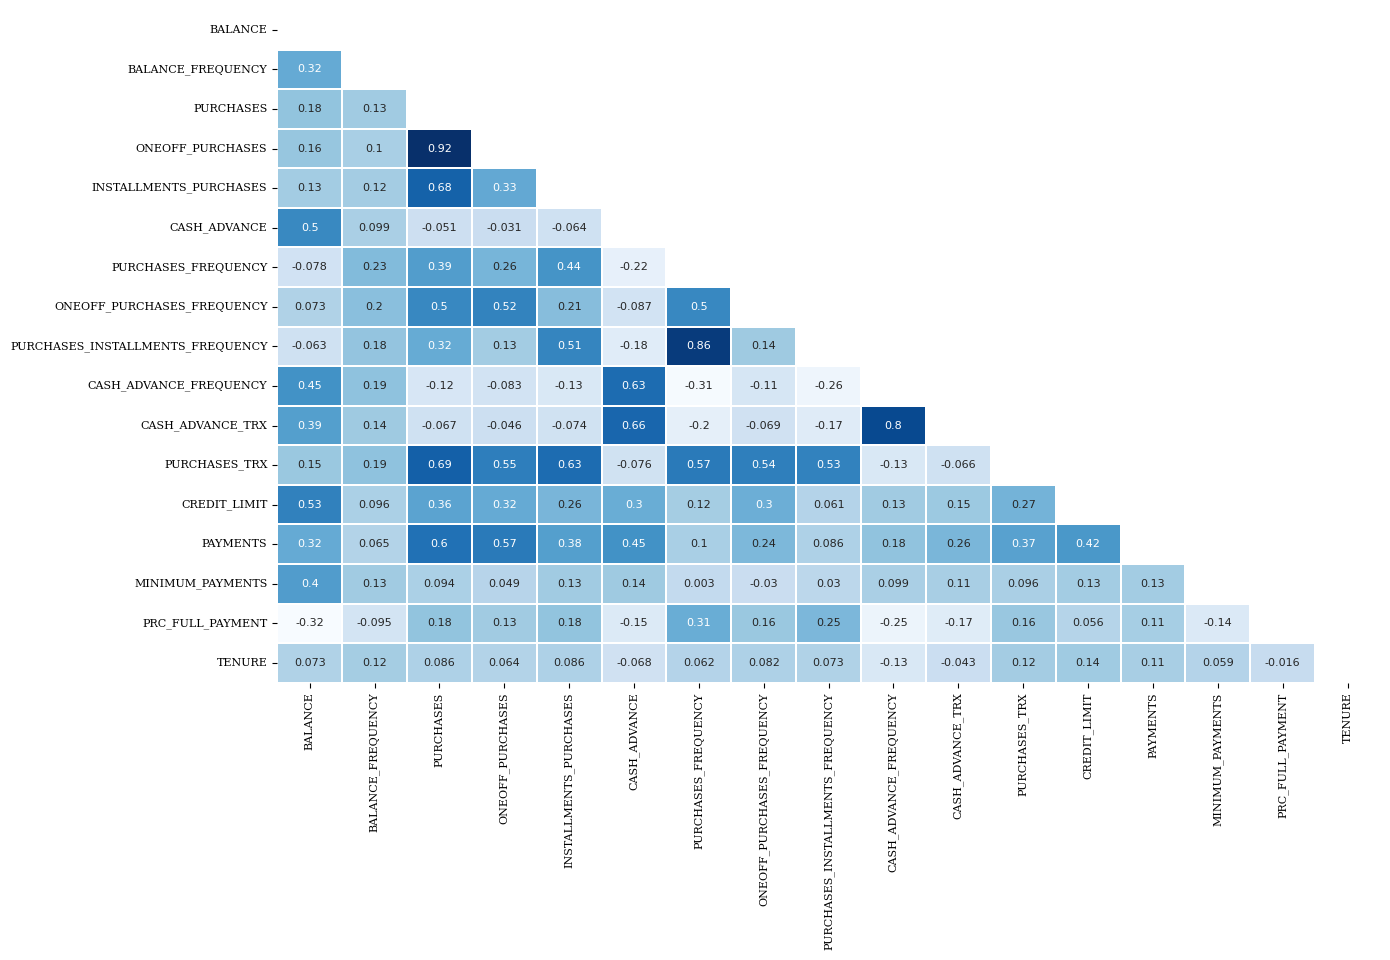

In [15]:
show_correlation_matrix(df)

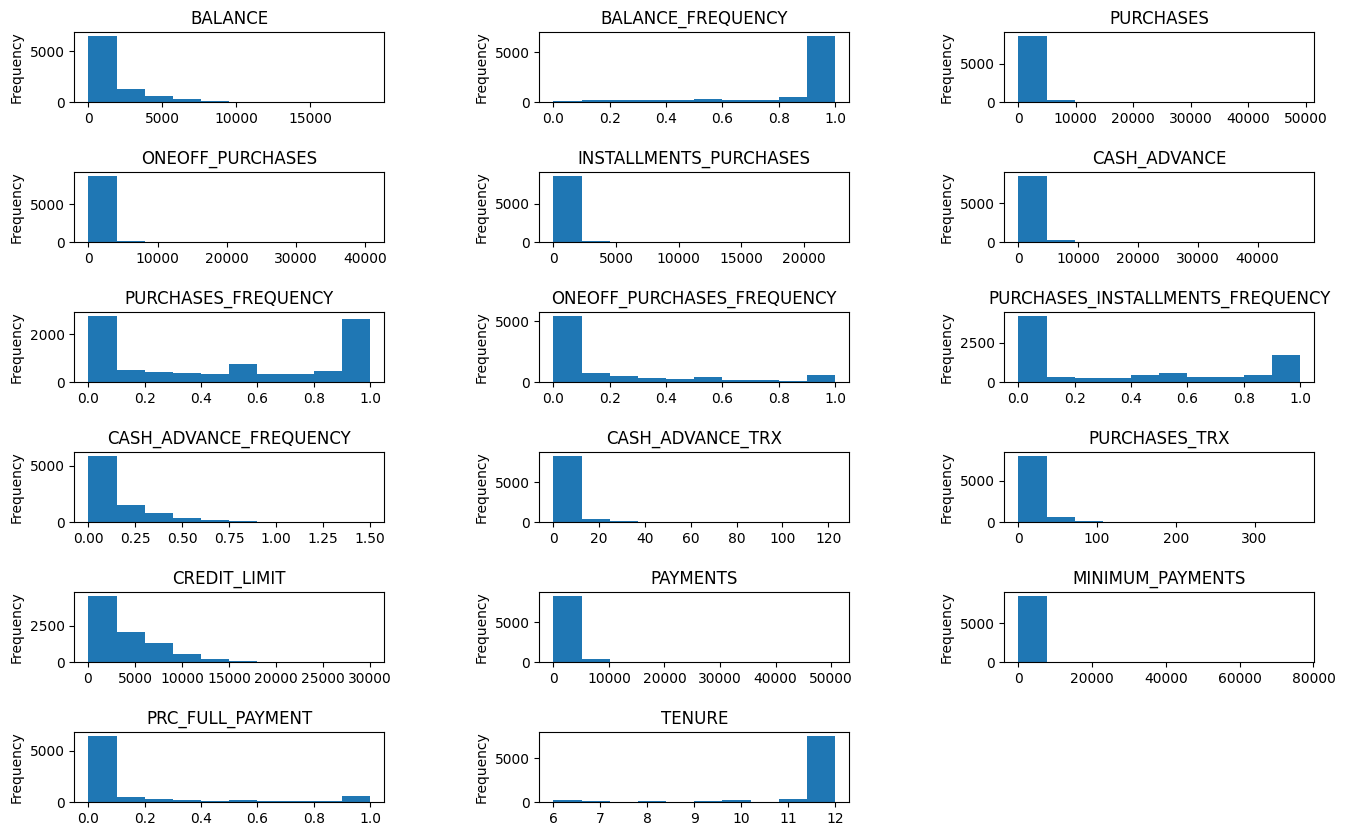

In [16]:
plot_distributions(df)

Da una prima osservazione dei dati posso dire che:

- La colonna CUST_ID è l'identificativo del cliente e verrà rimossa quando procederò con la creazione del modello (percui le features che ho a disposizione sono 17)
- Ci sono valori mancanti in CREDIT_LIMIT (1 valore mancante)
- Ci sono valori mancanti in MINIMUM_PAYMENTS (313 valori mancanti)
- 11 features hanno un elevato numero di valori 0.
- 3 features hanno un basso numero di valori 0.
- 3 features non hanno valori a 0.
- 13 colonne presentano una distribuzione asimmetrica verso destra
- ONEOFF_PURCHASES e PURCHASES sono fortemente correlate (0.92)
- PURCHASES_INSTALLMENTS_FREQUENCY e PURCHASES_FREQUENCY sono fortemente correlate (0.86)
- CASH_ADVANCE_TRX e CASH_ADVANCE_FREQUENCY sono fortemente correlate (0.80)
- Infine ci sono varie features che hanno una correlazione moderata (>0.50)







## ESEGUO L'INPUTAZIONE DEI VALORI MANCANTI
 Visto che dovrò effettuare il clustering sui dati, l'imputazione utilizzerà KNNImputer() per evitare risultati di clustering distorti.

 KNNImputer() è utile quando si vuole mantenere la struttura dei dati senza dover rimuovere le righe o le colonne con valori mancanti

 Salvo poi il risultato dell'inputazione in un nuovo dataframe per non sovascrivere i dati originali.

In [17]:
df_clean = remove_null_value(df)

df_clean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,3720.379789,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
show_report(df_clean)

THE DATAFRAME HAS 8950 ROWS AND 18 COLUMNS



,Data Type,Non-null Values,Missing Values,% Missing Values,Unique Values,% Unique Values,Zero Values,% Zero Values,Minimum Value,Maximum Value,Mean,Median
CUST_ID,object,8950,0,0.0,8950,100.00,0,0.00,C10001,C19190,NaN,NaN
BALANCE,float64,8950,0,0.0,8871,99.12,80,0.89,0.0,19043.13856,1564.474828,873.385231
BALANCE_FREQUENCY,float64,8950,0,0.0,43,0.48,80,0.89,0.0,1.0,0.877271,1.000000
PURCHASES,float64,8950,0,0.0,6203,69.31,2044,22.84,0.0,49039.57,1003.204834,361.280000
ONEOFF_PURCHASES,float64,8950,0,0.0,4014,44.85,4302,48.07,0.0,40761.25,592.437371,38.000000
INSTALLMENTS_PURCHASES,float64,8950,0,0.0,4452,49.74,3916,43.75,0.0,22500.0,411.067645,89.000000
CASH_ADVANCE,float64,8950,0,0.0,4323,48.30,4628,51.71,0.0,47137.21176,978.871112,0.000000
PURCHASES_FREQUENCY,float64,8950,0,0.0,47,0.53,2043,22.83,0.0,1.0,0.490351,0.500000
ONEOFF_PURCHASES_FREQUENCY,float64,8950,0,0.0,47,0.53,4302,48.07,0.0,1.0,0.202458,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,float64,8950,0,0.0,47,0.53,3915,43.74,0.0,1.0,0.364437,0.166667


## ELIMINO LE COLONNE CHE NON SERVONO
L'unica colonna da eliminare è **CUST_ID**

Salvo il risultato in un nuovo dataframe per non sovrascrivere i dati precedenti.

In [19]:
df_features = df_clean.drop(['CUST_ID'], axis=1)

df_features

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,3720.379789,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## ESEGUO LA STANDARDIZZAZIONE

 L'obiettivo principale della standardizzazione è quello di evitare che la scala di misurazione o la varianza delle features influenzino in modo eccessivo i risultati del modello che andrò a creare.

In [20]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df_features))

df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311729,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.087047,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103210,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.148440,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266722,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960383,-0.486217,-0.350470,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960383,-0.503396,1.219059,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960383,-0.570615,-0.336135,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097804,-0.580536,-0.347533,0.329200,-4.122768


Converto il dataframe ottenuto dalla standardizzazione in un array numpy per l'utilizzo successivo

In [21]:
X = np.asarray(df_norm)

## PRINCIPAL COMPONENT ANALYSIS (PCA)

 Utilizzare la PCA prima di applicare un algoritmo di clustering, consente di ridurre le dimensioni, il rumore nei dati e diminuire il costo computazionale.

 Il numero di features sarà ridotto a 2 dimensioni in modo che i risultati del clustering possano essere visualizzati facilmente.

In [22]:
# Applico la PCA
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_pca = pca.fit_transform(X)

## CERCO IL NUMERO DI CLUSTER DA UTILIZZARE PER IL MODELLO "KMEANS"

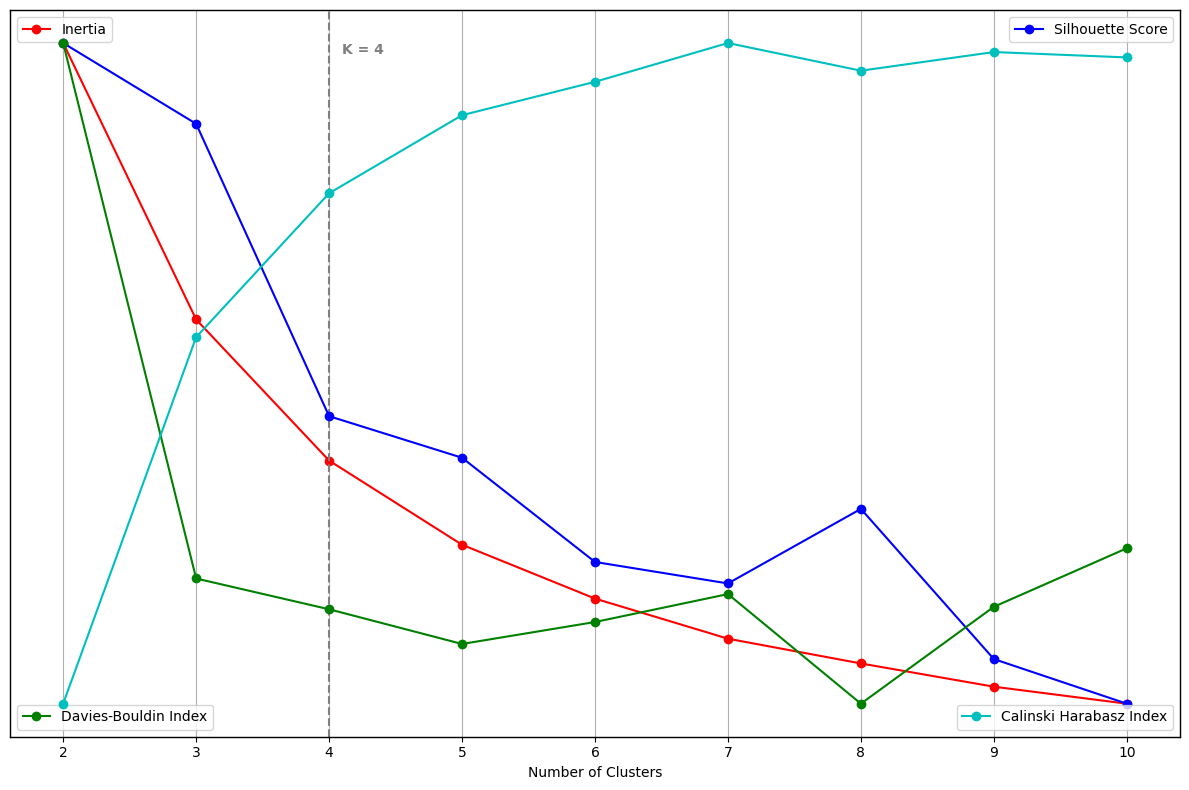


BEST NUMBER OF CLUSTERS (K): 4
Inertia: 24518.43
Silhouette Score: 0.41
Davies-Bouldin Index: 0.80
Calinski Harabasz Index: 5823.68


In [23]:
show_metrics(X_pca,10)

## IMPLEMENTO IL MODELLO "KMEANS"

In [24]:
K = 4

kmeans = KMeans(n_clusters=K, n_init=10, init="k-means++")
y_kmeans = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

## VISUALIZZO I CLUSTERS

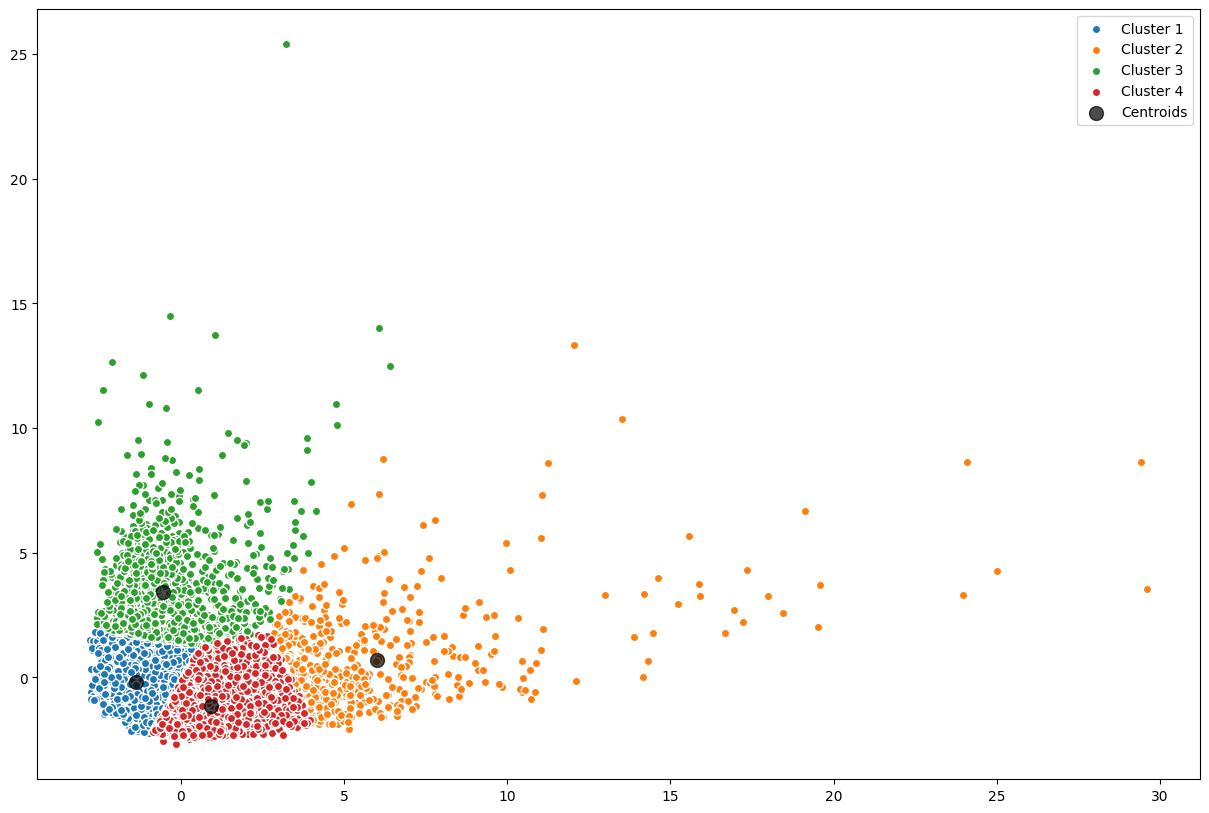

In [25]:
plot_scatter_pca(X_pca,y_kmeans,centroids)

## CREAZIONE DEL DATAFRAME FINALE CON INDICAZIONE DEI CLUSTER DI APPARTENENZA PER OGNI CLIENTE

In [26]:
df_final = df_clean.copy()

In [27]:
df_final['CLUSTER'] = y_kmeans+1

df_final

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,3720.379789,0.000000,6,4
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


## VERIFICA DELLE CARATTERISTICHE DISTINTIVE DI OGNI CLUSTER

In [28]:
calculate_clusters_profile(df_final)

,Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
0,BALANCE,mean,1012.915503,3401.840056,4510.612798,824.180354,1564.474828
1,BALANCE_FREQUENCY,mean,0.799792,0.988427,0.963486,0.919997,0.877271
2,PURCHASES,mean,223.081279,6894.613917,462.647357,1236.499406,1003.204834
3,ONEOFF_PURCHASES,mean,157.576608,4511.889901,300.127390,621.738764,592.437371
4,INSTALLMENTS_PURCHASES,mean,65.833785,2383.916859,162.619301,614.965725,411.067645
5,CASH_ADVANCE,mean,614.588758,773.154467,4401.478579,147.442197,978.871112
6,PURCHASES_FREQUENCY,mean,0.190099,0.954443,0.266258,0.862440,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.074901,0.726667,0.129829,0.301883,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.109962,0.808946,0.166187,0.675116,0.364437
9,CASH_ADVANCE_FREQUENCY,mean,0.122459,0.084806,0.470904,0.030698,0.135144


Basandosi sulla tabella sopra, si può concludere che ciascun cluster presenta le seguenti caratteristiche:

- Cluster 1: Questo cluster ha un saldo medio relativamente alto, un'alta frequenza di saldo, ma effettua acquisti relativamente bassi e raramente. Tuttavia, quando fa acquisti, tende a essere tramite pagamenti rateali anziché un unico pagamento. Questi clienti tendono a fare un uso significativo del credito per anticipi in contanti, con un numero medio elevato di transazioni di anticipi in contanti. Hanno un limite di credito medio abbastanza alto e effettuano pagamenti mediamente elevati rispetto agli altri cluster.

- Cluster 2: Questo cluster ha il saldo medio più basso tra i quattro cluster e una frequenza di saldo inferiore alla media. Anche i loro acquisti medi sono abbastanza bassi, con una proporzione significativa di acquisti singoli anziché rateali. Tuttavia, questo cluster ha un tasso di utilizzo di anticipi in contanti molto basso rispetto agli altri cluster.

- Cluster 3: Questo cluster ha un saldo medio abbastanza basso, ma una frequenza di saldo molto alta. Effettuano acquisti mediamente elevati, con una proporzione significativa di acquisti singoli e rateali. Hanno una frequenza di acquisto molto elevata e tendono ad utilizzare poco gli anticipi in contanti.

- Cluster 4: Questo è il cluster con il saldo medio più alto, effettuano acquisti estremamente elevati, sia singoli che rateali. Utilizzano anche molto gli anticipi in contanti, ma in proporzione ai loro alti acquisti, l'uso degli anticipi in contanti è relativamente basso. Hanno un limite di credito medio molto alto e fanno pagamenti mediamente elevati.



## DEFINIZIONE DEL TIPO DI CLIENTI

Basandomi sull'analisi dei dati forniti, posso ipotizzare i seguenti profili di clienti per ciascun cluster:

- **Cluster 1: Clienti Prudenti a Bilancio Ridotto** <br/>
Questo cluster potrebbe rappresentare clienti che gestiscono il loro bilancio con attenzione, cercando di mantenere i saldi bassi e di evitare l'accumulo di debito. Potrebbero essere persone che usano la carta di credito principalmente per emergenze o piccoli acquisti, preferendo pagare in contanti per la maggior parte delle loro spese. Potrebbero essere prudenti nell'evitare gli anticipi in contanti per evitare gli interessi elevati.

- **Cluster 2: Clienti con Spese Minime** <br/>
Questo cluster potrebbe includere clienti che utilizzano la carta di credito in modo limitato, preferendo fare principalmente acquisti in contanti o con altri mezzi di pagamento. Potrebbero essere persone che preferiscono risparmiare denaro e limitare il debito, evitando gli acquisti impulsivi e mantenendo i saldi bassi. Potrebbero anche essere clienti che non trovano molto vantaggioso l'utilizzo del credito per le loro esigenze finanziarie.

- **Cluster 3: Clienti Attivi e Moderati**<br/>
Questo cluster potrebbe rappresentare clienti che fanno un uso moderato della carta di credito, effettuando regolarmente acquisti sia singoli che rateali. Potrebbero essere persone che preferiscono la comodità e la sicurezza delle carte di credito per i loro acquisti quotidiani, ma che cercano comunque di mantenere il debito sotto controllo. Potrebbero essere più propensi a sfruttare le offerte promozionali e i programmi fedeltà offerti dalle carte di credito.

- **Cluster 4: Clienti Spendersi Indiscriminati** <br/>
Questo cluster potrebbe comprendere clienti che fanno un uso estensivo della carta di credito per fare acquisti di grandi dimensioni e frequenti. Potrebbero essere persone che amano lo shopping e che non esitano a usare il credito per soddisfare i loro desideri immediati. Potrebbero essere più disposti a prendere in considerazione gli anticipi in contanti per finanziare i loro acquisti. Potrebbero essere clienti che cercano status e prestigio attraverso il loro potere di spesa.

## SUGGERIMENTI DI MARKETING

Ecco alcuni suggerimenti di marketing per ciascun cluster, considerando i diversi comportamenti finanziari e le caratteristiche dei clienti:

- **Cluster 1: Clienti Prudenti a Bilancio Ridotto** <br/>
  - Offrire programmi di fidelizzazione che premiano la gestione prudente del denaro, ad esempio offerte speciali o sconti per coloro che mantengono bassi i saldi.
  - Fornire strumenti educativi e risorse per aiutare i clienti a gestire meglio il loro denaro, ad esempio guide finanziarie online o consulenze finanziarie gratuite.
  - Promuovere offerte a basso interesse per incoraggiare l'uso della carta di credito per acquisti di emergenza o necessità, evidenziando la flessibilità e la convenienza del credito quando necessario.

- **Cluster 2: Clienti con Spese Minime** <br/>
  - Concentrarsi su offerte speciali o programmi di cashback che premiano l'uso della carta di credito per determinate categorie di spesa, ad esempio supermercati o carburante, per incentivare l'utilizzo della carta.
  - Creare campagne di marketing che sottolineano i vantaggi della carta di credito per la costruzione del credito e l'acquisto sicuro online.
  - Offrire promozioni di iscrizione con bonus di iscrizione o sconti per incoraggiare i clienti a utilizzare la carta di credito per la prima volta.

- **Cluster 3: Clienti Attivi e Moderati** <br/>
  - Personalizzare le offerte promozionali in base ai modelli di spesa individuali dei clienti, ad esempio offrire sconti o premi su categorie di acquisto preferite.
  - Lanciare programmi di fedeltà che premiano la frequenza e la varietà degli acquisti, ad esempio accumulando punti bonus per ogni acquisto.
  - Creare esperienze di acquisto online e offline fluide e convenienti per soddisfare le esigenze di questo segmento di clientela attiva.

- **Cluster 4: Clienti Spendersi Indiscriminati** <br/>
  - Offrire programmi di premi di lusso o esperienze esclusive che attraggono questo segmento di clientela ad alto reddito e ad alto consumo.
  - Creare partnership con marchi di lusso o offrire servizi di concierge premium per aumentare l'attrattiva della carta di credito per questo tipo di clienti.
  - Lanciare campagne pubblicitarie che si concentrano sullo stile di vita di lusso e sull'accesso privilegiato a eventi esclusivi per attrarre e fidelizzare questo segmento di clientela.